# Regresión Lineal
*Ali Saúl Rojas Valero*

Es un modelo matemático **que** busca aproximar una relación matemática entre una variable considerada dependiente (salida "$y$") y una o más variables consideradas independientes (entradas "$x_i$") calculando la ecuación matemática que mejor se ajusta a un grupo de muestras de entradas-salida, es decir, muestras del tipo $(x_0,x_1..,y)$ llamadas ejemplos o entrenamientos, para poder luego predecir la salida de nuevas entradas.

En el presente ejemplo, realizaremos una regresión lineal para una sola variable dependiente


In [ ]:
# Agreguemos la librería numpy para realizar cálculos
# matemáticos cómodamente

import numpy as np

# Y matplotlib para graficar

import matplotlib.pyplot as plt

# Y creamos una función para dar formato a los gráficos

def formatear_grafica ():
    plt.legend(loc="upper left")
    plt.xlabel('Variable indepediente') #, fontsize=18)
    plt.ylabel('Variable depediente') #, fontsize=16)
    plt.grid(); plt.show();

## Simulación de datos de entrenamiento
Crearemos el conjunto de datos de entrenamiento, a partir de una recta, a los que agregaremos algo de ruido aleatorio. La regresión deberá entregar una recta muy similar a la recta original de la cual hemos tomado los datos.

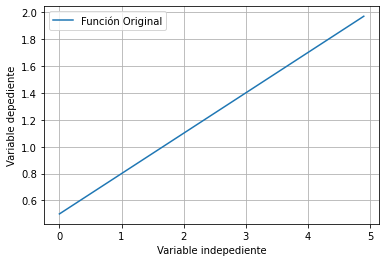

In [ ]:
# Primero definamos la clase recta que nos permitirá 
# crear funciones de rectas que pueden evaluar entradas

#''' Recta configurable #######################
class recta:
    def __init__(self, pendiente, intercepto):
        self.__m = pendiente
        self.__b = intercepto
    def __call__(self, x):
        return self.__m*x + self.__b
###########################################'''#

# Y la usaremos para iniciar los datos de entrenamiento:

m = 0.3
b = 0.5
f = recta(m,b)

x = np.arange(0,5,0.1) # x = [0, 0.1, 0.2 ... 4.9, 5]
fx = f(x)

plt.plot(x,fx,label='Función Original')
formatear_grafica()

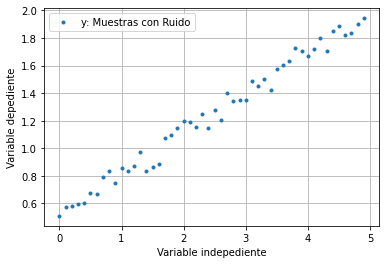

In [ ]:
# Ahora crearemos el conjunto de datos de entrenamiento
# propiamente dicho agregando algo de ruido a la variable
# dependiente

#''' Agregador de Ruido #################
def agregar_ruido(x):
    np.random.seed(0)
    return x + 0.2*(np.random.rand(x.shape[0])-0.5)
#####################################'''#

y = fx
y = agregar_ruido(y)

plt.plot(x,y,'.',label='y: Muestras con Ruido')
formatear_grafica()

Ahora calcularemos con una librería la regresión lineal, esto es obtener la pendiente "$m$" y el intercepto "$b$" que mejor se ajustan a nuestros datos: 

In [ ]:
#''' Regresion Lineal de Sklearn ########
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.reshape(-1,1),y)
m_reg = reg.coef_
b_reg = reg.intercept_
print("m_reg =",*m_reg,  "\tm =",m)
print("b_reg =", b_reg,  "\tb =",b)
#####################################'''#

m_reg = 0.2915172890201704 	m = 0.3
b_reg = 0.5283756655556907 	b = 0.5


Como podemos ver los valores son bastante cercanos a aquellos con los que definimos la recta original de la que sacamos los puntos de entrenamiento antes de agregar ruido.

Ahora creamos la recta de regresión con esos datos:

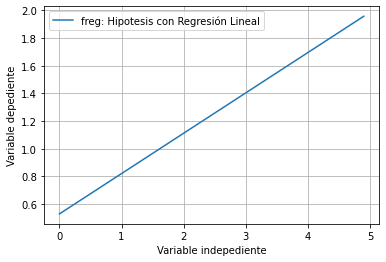

In [ ]:
freg = recta(*m,b)
h = freg(x)

plt.plot(x,h,label='freg: Hipotesis con Regresión Lineal')
formatear_grafica()

Finalmente grafiquemos todas las rectas juntas para observar sus similitudes:

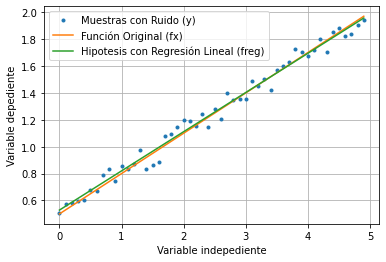

In [ ]:
plt.plot(x,y,'.',label='Muestras con Ruido (y)')
plt.plot(x,fx,label='Función Original (fx)')
plt.plot(x,h,label='Hipotesis con Regresión Lineal (freg)')
formatear_grafica()